In [1]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1) Carrega os dados

df = pd.read_csv(
    "dados/MQD_1465_final.csv",
    sep=',',              # separador de colunas
    quoting=csv.QUOTE_ALL,# trata todos os campos como strings entre aspas
    quotechar='"',        # caractere de aspas
    skipinitialspace=True, # remove espaços após as vírgulas,
    encoding='utf-8'     # codificação do arquivo
)

df.columns = df.columns.str.strip() # remove espaços em branco dos nomes das colunas
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

print("Colunas disponíveis:")
print(df.columns.tolist())  


# Verificar o tamanho do arquivo e as primeiras linhas
print("Dimensões do DataFrame:", df.shape)
print("\nPrimeiras linhas:")
print(df.head())

# Verificar nomes das colunas
print("\nColunas disponíveis:")
print(df.columns.tolist())



Colunas disponíveis:
['ItemNumber', 'frase', 'cla_maj_femi', 'qtd_maj_femi', 'cla_maj_masc', 'qtd_maj_masc', 'f1_class', 'f2_class', 'f3_class', 'f4_class', 'm1_class', 'm2_class', 'm3_class', 'm4_class', 'f1_tempo', 'f2_tempo', 'f3_tempo', 'f4_tempo', 'm1_tempo', 'm2_tempo', 'm3_tempo', 'm4_tempo']
Dimensões do DataFrame: (1465, 22)

Primeiras linhas:
   ItemNumber                                              frase cla_maj_femi  \
0           1  Você sabia que o menino que mais vai te dar va...     positiva   
1           2  Hoje com 21 anos, como que por auxilio lá do a...     positiva   
2           3  Nesse momento to evitando ela, e ta me dando u...     negativa   
3           4  Meus sentidos de garota diziam que tinha algum...       neutra   
4           5  Aquela promessa que eu te fiz naquele natal, e...     positiva   

   qtd_maj_femi cla_maj_masc  qtd_maj_masc  f1_class  f2_class  f3_class  \
0             4     positiva             4  positiva  positiva  positiva   
1     

In [2]:

# 2) Vamos assumir que existam colunas:
#    - 'frase' (texto original ou tratado)
#    - 'cla_maj_masc' (rótulo majoritário masculino: 'positiva', 'negativa', 'neutra')
#    - 'cla_maj_femi' (rótulo majoritário feminino: 'positiva', 'negativa', 'neutra')

X = df["frase"]                # Features (texto)
y_masc = df["cla_maj_masc"]    # Rótulos masculinos
y_femi = df["cla_maj_femi"]    # Rótulos femininos

# 3) Split único para manter as MESMAS frases e índices
# Repare que passamos y_masc e y_femi ao mesmo tempo.
X_train, X_test, y_masc_train, y_masc_test, y_femi_train, y_femi_test = train_test_split(
    X, y_masc, y_femi,
    test_size=0.2,
    random_state=42,
    stratify=y_masc  # ou y_femi, dependendo de qual rótulo deseja estratificar
)

# 4) Vetorização TF-IDF do texto
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

# 5) Modelo recomendado: LogisticRegression (rápido, boa performance e interpretável).
#    Você pode ajustar parâmetros conforme necessário (ex: solver, regularização, etc.).

# --- MODELO MASCULINO ---
clf_masc = LogisticRegression(random_state=42, max_iter=1000)
clf_masc.fit(X_train_tfidf, y_masc_train)

# Previsões para o conjunto de teste
y_masc_pred = clf_masc.predict(X_test_tfidf)

# Relatório de classificação
print("=== Modelo para cla_maj_masc ===")
print(classification_report(y_masc_test, y_masc_pred))

# --- MODELO FEMININO ---
clf_femi = LogisticRegression(random_state=42, max_iter=1000)
clf_femi.fit(X_train_tfidf, y_femi_train)

# Previsões para o conjunto de teste
y_femi_pred = clf_femi.predict(X_test_tfidf)

# Relatório de classificação
print("=== Modelo para cla_maj_femi ===")
print(classification_report(y_femi_test, y_femi_pred))


=== Modelo para cla_maj_masc ===
              precision    recall  f1-score   support

    negativa       0.60      0.60      0.60       103
      neutra       0.47      0.14      0.21        66
    positiva       0.56      0.77      0.65       124

    accuracy                           0.57       293
   macro avg       0.54      0.50      0.49       293
weighted avg       0.56      0.57      0.53       293

=== Modelo para cla_maj_femi ===
              precision    recall  f1-score   support

    negativa       0.54      0.52      0.53       106
      neutra       0.40      0.34      0.37        85
    positiva       0.53      0.62      0.57       102

    accuracy                           0.50       293
   macro avg       0.49      0.49      0.49       293
weighted avg       0.50      0.50      0.50       293



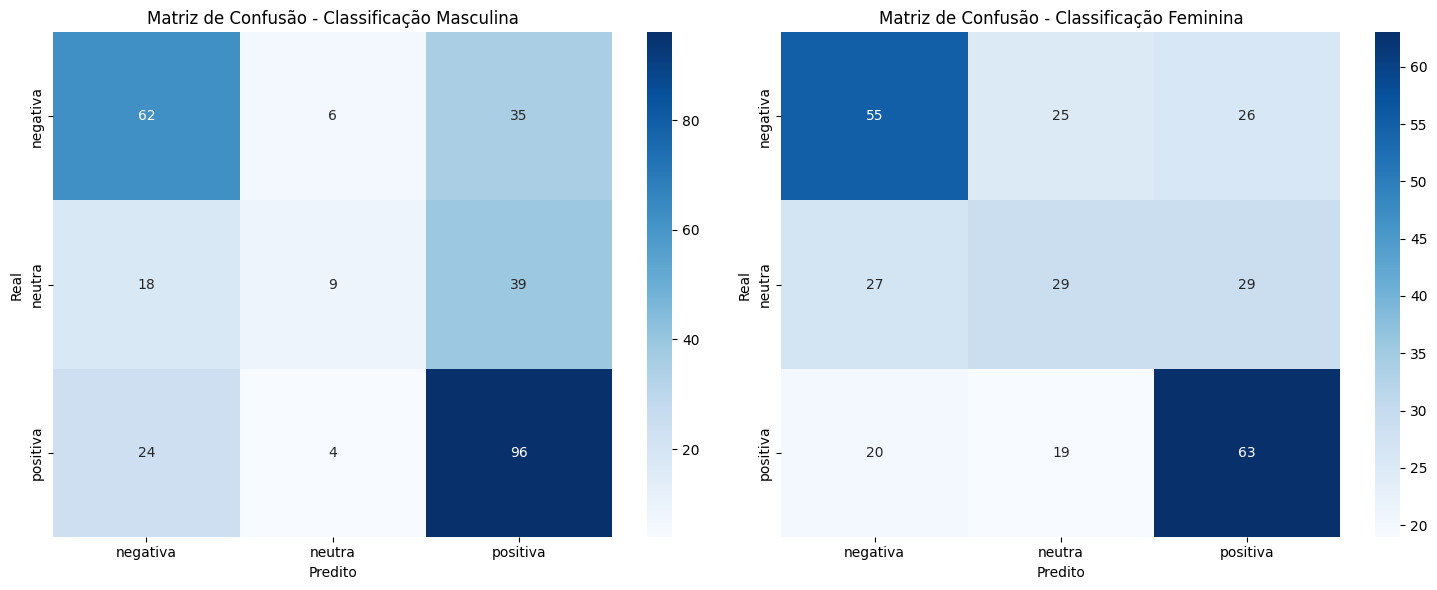

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt

# Criar figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Matriz de confusão para classificação masculina
cm_masc = confusion_matrix(y_masc_test, y_masc_pred)
sns.heatmap(cm_masc, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negativa', 'neutra', 'positiva'],
            yticklabels=['negativa', 'neutra', 'positiva'],
            ax=ax1)
ax1.set_title('Matriz de Confusão - Classificação Masculina')
ax1.set_xlabel('Predito')
ax1.set_ylabel('Real')

# Matriz de confusão para classificação feminina
cm_femi = confusion_matrix(y_femi_test, y_femi_pred)
sns.heatmap(cm_femi, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negativa', 'neutra', 'positiva'],
            yticklabels=['negativa', 'neutra', 'positiva'],
            ax=ax2)
ax2.set_title('Matriz de Confusão - Classificação Feminina')
ax2.set_xlabel('Predito')
ax2.set_ylabel('Real')

plt.tight_layout()
plt.show()